### Preprocessing Titanic dataset

Importing the relevant packages:

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

Importing train and test dataset:

In [2]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')
print('Dimensions of the raw train dataset: {}'.format(raw_train.shape))
print('Dimensions of the raw test dataset: {}'.format(raw_test.shape))

Dimensions of the raw train dataset: (891, 12)
Dimensions of the raw test dataset: (418, 11)


Dropping the PassengerId column, since it brings no useful information:

In [3]:
train = raw_train.drop('PassengerId', axis=1)
test = raw_test.drop('PassengerId', axis=1)

In [4]:
all_df = pd.concat([train, test], axis = 0, ignore_index=True)
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [5]:
print("Number and percentage of Nan in the total dataset")
pd.DataFrame({'# of NaN':all_df.isnull().sum(), '% of Nan':(100*all_df.isnull().sum()/all_df.shape[0]).round(1)})

Number and percentage of Nan in the total dataset


,# of NaN,% of Nan
Survived,418,31.9
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,263,20.1
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,1,0.1
Cabin,1014,77.5


Of course the 418 NaN values in Survived represent the test dataset

### Some plots

<AxesSubplot:>

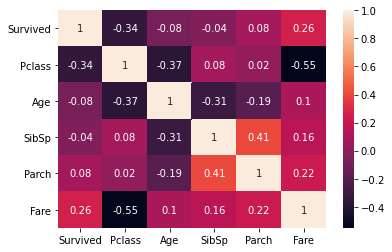

In [6]:
corr_matrix = train.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

Text(0.5, 1.0, 'Fare logarithmic distribution')

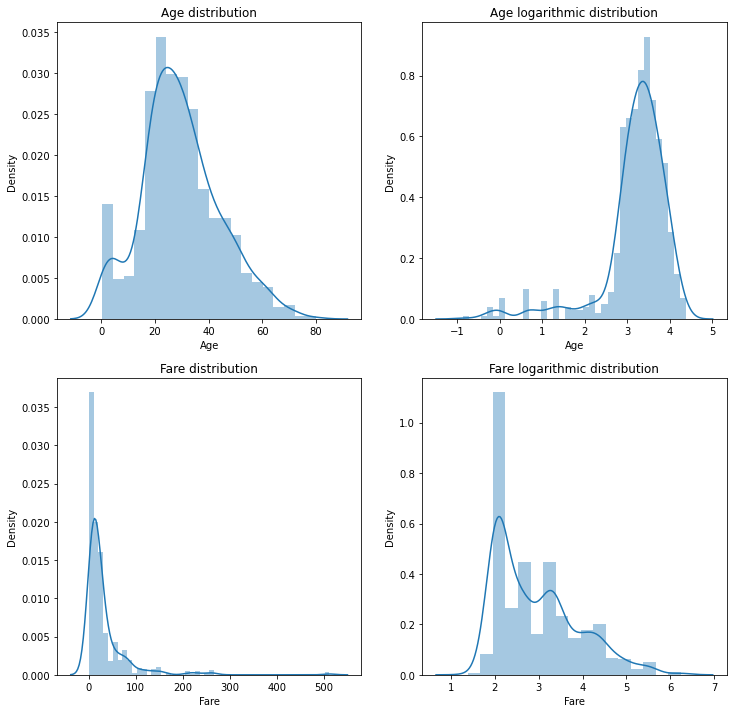

In [7]:
fare_nozero = train[train.Fare!=0].Fare

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(a=train['Age'])
plt.title('Age distribution')
plt.subplot(2,2,2)
sns.distplot(a=np.log(train['Age']))
plt.title('Age logarithmic distribution')
plt.subplot(2,2,3)
sns.distplot(a=train['Fare'])
plt.title('Fare distribution')
plt.subplot(2,2,4)
sns.distplot(a=np.log(fare_nozero))
plt.title('Fare logarithmic distribution')

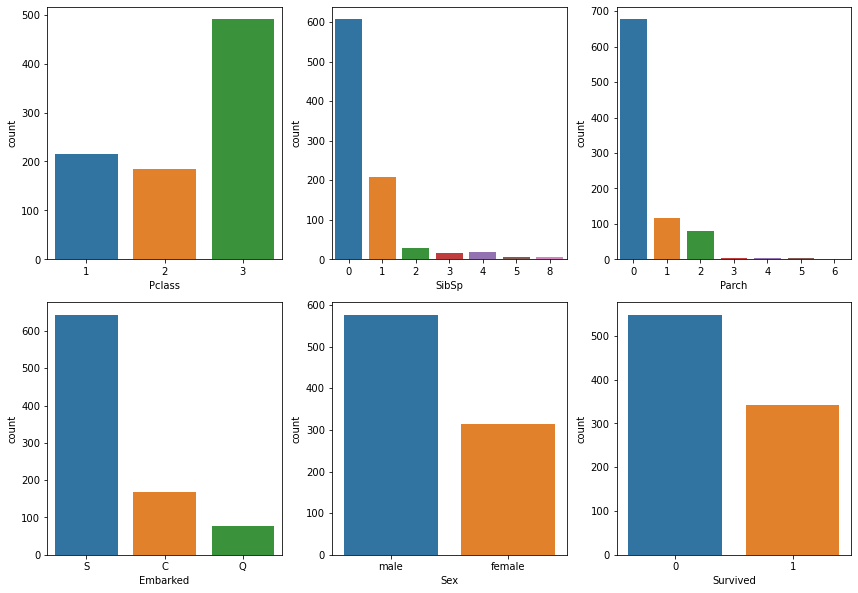

In [8]:
plt.figure(figsize=(12,12))
col = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex', 'Survived']

for sub, col in enumerate(col):
    plt.subplot(3,3,sub+1)
    sns.countplot(x=col, data=train);
    
plt.tight_layout(pad=1)

In [16]:
pC = train.loc[train['Embarked']=='C']['Survived']
rate_C = 100*sum(pC)/len(pC)
pS = train.loc[train['Embarked']=='S']['Survived']
rate_S = 100*sum(pS)/len(pS)
pQ = train.loc[train['Embarked']=='Q']['Survived']
rate_Q = 100*sum(pQ)/len(pQ)

print('Percentage of people embarked in Cherbourg that survived: {} %'.format(rate_C))
print('Percentage of people embarked in Southampton that survived: {} %'.format(rate_S))
print('Percentage of people embarked in Queenstown that survived: {} %'.format(rate_Q))

Percentage of people embarked in Cherbourg that survived: 55.357142857142854 %
Percentage of people embarked in Southampton that survived: 33.69565217391305 %
Percentage of people embarked in Queenstown that survived: 38.96103896103896 %


It looks like there is a higher probability to survive being embarked at Cherbourg. Probably people embarked there payed a higher fare and was in a higher Pclass. Let's check:

In [15]:
all_df.groupby(['Embarked'])[['Fare', 'Pclass']].mean()

,Fare,Pclass
Embarked,,
C,62.336267,1.851852
Q,12.409012,2.894309
S,27.418824,2.347921


In [19]:
print(all_df.groupby(['Pclass'])['Fare'].mean())
print(all_df.groupby(['Pclass'])['Fare'].std())

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64
Pclass
1    80.447178
2    13.607122
3    11.494358
Name: Fare, dtype: float64


Encoding the ${\bf Sex}$ categorical variable, assigning 1 to Male and 0 to female:

In [ ]:
all_df['Sex'].replace({'male': 1, 'female': 0}, inplace=True)

The ${\bf Name}$ itself is not particularly interesting, unless one wants to identify relatives of a given person, but the title (such as Mr., Master., Col., etc.) can bring relevant information and can help filling the Age missing values.
I change the Name column in order to keep only the titles.

In [ ]:
all_df_name = all_df.copy()
name = all_df['Name'].str.split(',', expand=True)
title = name[1].str.split('.', expand=True)[0]
all_df_name['Name'] = name
all_df_name['Title'] = title

I change manually two entries that were misinterpreted. Since I don't know the title for Reuchlin, Jonkheer. John George, I assign him the generic title of Mr.

In [ ]:
all_df_name['Title'][all_df_name.loc[all_df_name['Title']=='the'].index] = 'Countess.'
all_df_name['Title'][all_df_name.loc[all_df_name['Title']=='Jonkheer.'].index] = 'Mr.'

I can check how many people have missing age information grouping them by title.
I can also see what is the mean age for each title. For instance it is clear that Master. indicates children, therefore when replacing the NaN values this must be taken into account.

In [ ]:
print(all_df_name[pd.isnull(all_df_name.Age)].groupby(['Title']).Title.count())
print(all_df_name[['Title','Age']].groupby(['Title']).mean().round(1))

One possibility is to replace the NaN values in ${\bf Age}$ with the mean of the Age values in the corresponding categories of Name. It is not the only possibility, probably also SibSp and ParCh variables could be taken into account.

In [ ]:
all_df_name['Age'] = all_df_name.groupby(['Name'])['Age'].transform(lambda x: x.fillna(x.mean()))

Let's look at the ${\bf SibSp}$ and ${\bf ParCh}$ variables grouping by name, we should detect entire families travelling together.

In [ ]:
inspect_df = all_df_name.groupby('Name')
for name, frame in inspect_df:
    print(f"Entries for {name!r}")
    print("------------------------")
    print(frame[['Age','SibSp','Parch']], end="\n\n")

In [ ]:
all_df_name['Family Members'] = all_df_name['SibSp'] + all_df_name['Parch'] + 1

In [ ]:
all_df_name.columns.values

Let's reorder the columns

In [ ]:
columns_reordered = ['Survived', 'Pclass', 'Title', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Family Members',
       'Ticket', 'Fare', 'Cabin', 'Embarked']
all_df_name = all_df_name[columns_reordered]

Now let's look at the ${\bf Cabin}$.

In [ ]:
all_df_cabin = all_df_name.copy()
all_df_cabin['Cabin'] = all_df_cabin['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'NA')
all_df_cabin.Cabin.replace(['T'], 'NA', inplace=True)
#train.Cabin.value_counts()
all_cabin = all_df_cabin.Cabin.value_counts()
survived = all_df_cabin.groupby(all_df_cabin['Cabin']).Survived.sum()
perc_of_surv = 100*survived/all_cabin
print(pd.DataFrame({'# of passengers': all_cabin, 'Survived': survived, '% of survived':perc_of_surv.round(1)}))

It looks like passengers in cabins whose name starts with B, D and E have higher possibility of survival. It also seems that when the cabin is not known the probability of survival is lower. Unfortunately here we have lots of missing values (77%) so it is not clear whether this information will be usable or not.